# Instructions {-}
Ce sujet est constitué de deux parties : la partie 1 correspond au sujet donné l'an dernier, dont la correction vous est donnée, la partie 2 constitue la partie qui sera évaluée et se place dans la continuité de la partie 1.

# Enoncé du problème (Partie 1)

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en vérifiant que $L$ est bien intégrable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En déduire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 à la loi conditionnelle (on calculera en particulier l'espérance conditionnelle de $\mathbf{Z}$ sachant les données et la décomposition de Cholesky de la matrice de covariance conditionnelle sachant les données).*

## Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Implémentation

### Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [2]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [3]:
distmat=abs(np.subtract.outer(discretization,discretization))

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [4]:
Sigma=Covexp(distmat,a,sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [5]:
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

In [6]:
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

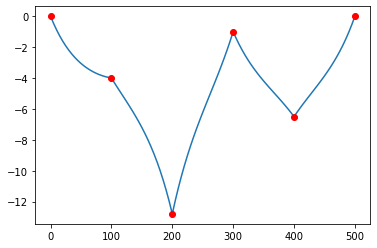

In [7]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [8]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

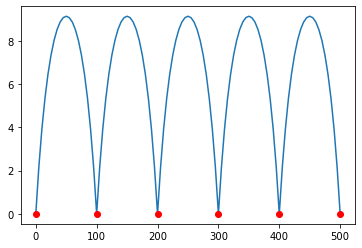

In [9]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de données (puisque la valeur est fixée) puis qu'elle augmente lorsqu'on s'éloigne des données*

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

In [10]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

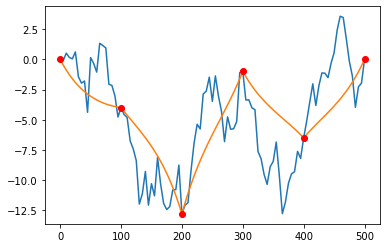

In [11]:
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'espérance conditionnelle est lisse car c'est la fonction des données qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du modèle et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [12]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [13]:
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)


In [14]:
sum(result)/K

522.4414115204074

In [15]:
length(allval1,Delta)

501.6468416918411

*On donne ici directement les résultats pour 100000 simulations (comparer la vitesse d'éxécution avec votre code pour voir l'intérêt de la vectorisation).*

*On voit ici que la longueur donnée par l'espérance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est dû au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'espérance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit où on a utilisé une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

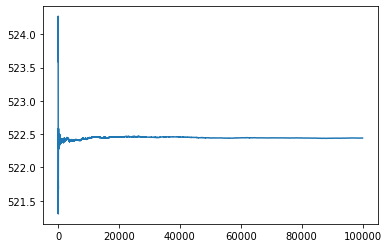

In [16]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'après la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles après quelques dizaines de milliers de simulations*

11. Représenter l'histogramme des longueurs de câbles générées.

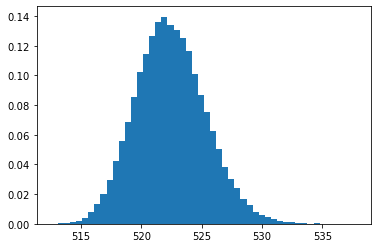

In [17]:
plt.hist(result,50,density=True)
plt.show()

*L'histogramme ressemble à une densité gaussienne, avec néanmoins une légère dissymétrie (plus de valeurs fortes).*

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

*1ère méthode : par approximation gaussienne. L'histogramme précédent suggère qu'une loi gaussienne peut bien représenter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'écart type de l'échantillon de longueurs de câble puis en appliquant la formule du cours.*

In [18]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.7645212680487, 528.1183017727661]

*2e méthode : on extrait les quantiles à 2.5% et 97.5% de l'échantillon, c'est-à-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [19]:
np.quantile(result,[0.025,0.975])

array([517.11883654, 528.41997161])

*ATTENTION : ici l'utilisation du TCL tel qu'exposé au début du chapitre 5 fournissait un intervalle de confiance de l'**espérance de la longueur de câble** et non de la **longueur de câble** (erreur fréquente).*

*On voit par ailleurs que la 2e méthode est plus précise car elle est basée directement sur la loi empirique de l'échantillon*

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [20]:
np.mean(result>525)

0.18647

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des différentes quantités calculées : moyennes, quantiles, probabilité de dépassement de seuil.*

# Enoncé 2021 (Partie 2)

Nous nous plaçons dans le même cadre que ci-dessus. Nous tenons pour acquis les résultats précédents et allons maintenant approfondir l'analyse.

## Valeurs positives

1. A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur présentent des valeurs positives, ce qui n'a pas de sens si on considère qu'il n'y a pas de partie émergée entre les deux côtes. Proposer et implémenter un algorithme de type rejet qui ne génèrera que des valeurs négatives. Représenter un profil de profondeur généré.

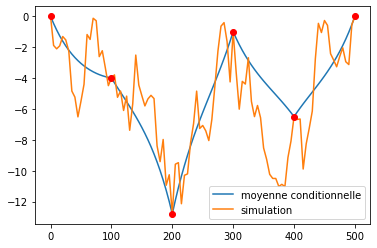

In [21]:
"""La matrice Cholesky étant triangulaire inférieure, la profondeur simulée à une abscisse i dépend des variables aléatoires x[j] pour j allant de 0 à i, où x est le vecteur gaussien utilisé en première partie. Si i est l'abscisse minimale pour laquelle la profondeur est positive, il suffit alors de recalculer x[i] sans modifier les x[j] avec 0<=j<i"""

Cholesky = np.linalg.cholesky(SigmaCond)
n = np.shape(unknown_indexes)[0]
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)
x_neg = x
for i in range(n):
    while Ec[i] + np.matmul(Cholesky,x_neg)[i] >= 0 :
        x_neg[i] = np.random.normal(0,1)
simu_rejet = Ec + np.matmul(Cholesky,x_neg)

allval3 = np.zeros(N)
allval4 = np.zeros(N)
allval3[unknown_indexes]=simu
allval4[unknown_indexes]=simu_rejet
allval3[observation_indexes]=depth
allval4[observation_indexes]=depth
plt.plot(discretization,allval1, label = 'moyenne conditionnelle')
plt.plot(discretization,allval4, label = 'simulation')
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.legend()
plt.show()

2. L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de câble ? Sur l'histogramme des longueurs de câble ? Sur l'intervalle de confiance obtenu par la méthode des quantiles ? Sur la probabilité de dépassement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Considérer 10000 simulations.

In [22]:
K=10000
result = np.zeros(K)
result_rejet = np.zeros(K)
rejet = np.zeros(K)
for i in range(K):
    t_rejet = 0
    n_iter = 101
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]= Ec + np.matmul(Cholesky,x)
    result[i] = length(allval3,Delta)
    x_rejet = x
    for j in range(n):
        while Ec[j] + np.matmul(Cholesky,x_rejet)[j] >= 0 :
            x_rejet[j] = np.random.normal(0,1)
            t_rejet += 1
            n_iter += 1
    allval4[unknown_indexes] = Ec + np.matmul(Cholesky,x_rejet)
    result_rejet[i]=length(allval4,Delta)
    rejet[i] = t_rejet/n_iter

print(f"taux de rejet : {sum(rejet)/K}")
print(f"intervalle de confiance sans rejet : {np.quantile(result,[0.025,0.975])}")
print(f"intervalle de confiance avec rejet : {np.quantile(result_rejet,[0.025,0.975])}")
print(f"probabilité de dépassement du seuil sans rejet : {np.mean(result>525)}")
print(f"probabilité de dépassement du seuil avec rejet : {np.mean(result_rejet>525)}")

taux de rejet : 0.043188355134409176
intervalle de confiance sans rejet : [517.27436979 528.58650326]
intervalle de confiance avec rejet : [516.36866607 527.34726823]
probabilité de dépassement du seuil sans rejet : 0.19
probabilité de dépassement du seuil avec rejet : 0.1075


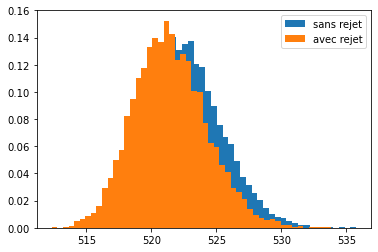

In [23]:
"""Comparaison des histogrammes"""

plt.hist(result,50,density=True, label = 'sans rejet')
plt.hist(result_rejet,50,density=True, label = 'avec rejet')
plt.legend()
plt.show()

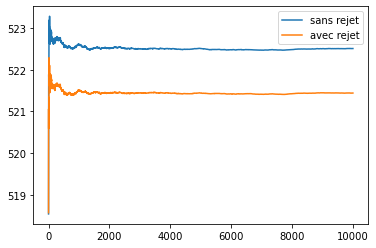

In [24]:
"""Comparaison des valeurs moyennes"""

indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu, label = 'sans rejet')
plt.plot(indice_simu,np.cumsum(result_rejet)/indice_simu, label = 'avec rejet')
plt.legend()
plt.show()

On observe que la longueur du câble est en moyenne amoindrie d'environ un mètre. L'intervalle de confiance et l'histogramme sont donc déplacés dans ce sens et la probabilité de dépassement du seuil diminue.

## Approche Bayésienne

Dans la première partie, on a considéré que l'ensemble des paramètres du modèle était parfaitement connu. Toutes choses égales par ailleurs, on va maintenant considérer que la moyenne $\mu$ est issue d'une estimation entâchée d'une incertitude. Plus précisément, on va modéliser cette incertitude en considérant que $\mu \sim \mathcal{N}(-5,4)$.

On va également décomposer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions théoriques

3. Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
où $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : écrire la densité jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densité puis identifier la forme quadratique faisant intervenir $\mu$.

On va calculer la densité $f_{\mu | Z_{OBS}=z_{OBS}}$ grâce à la formule de Bayes, selon laquelle on a pour tous $\nu \in \mathbb{R}$, $z_{OBS} \in \mathbb{R}^6$:

$$ f_{\mu | Z_{OBS}=z_{OBS}}(\nu)f_{Z_{OBS}}(z_{OBS}) = f_{Z_{OBS} | \mu=\nu}(z_{OBS})f_{\mu}(\nu)$$

Soit $z_{OBS} \in \mathbb{R}^6$. On a, par formule du balayage conditionnel :
$$
\begin{align*}
f_{Z_{OBS}}(z_{OBS}) &= \int_{\mathbb{R}} f_{Z_{OBS} | \mu=\nu}(z_{OBS})f_{\mu}(\nu) \, \mathrm{d}\nu\\
&= \int_{\mathbb{R}} \left(\frac{1}{(2\pi)^6\sqrt{det(C_{OBS})}}e^{-\frac{1}{2}(z_{OBS} - \nu\cdot1)^TC_{OBS}^{-1}(z_{OBS} - \nu\cdot1)}\right)\left(\frac{1}{2\sqrt{2\pi}}e^{-\frac{(\nu + 5)^2}{8}}\right) \, \mathrm{d}\nu \\
&= \int_{\mathbb{R}} \frac{1}{2(2\pi)^{\frac{7}{2}}\sqrt{det(C_{OBS})}}e^{-\frac{1}{2}\left((1^TC_{OBS}^{-1}1 + \frac{1}{4})\nu^2 + (\frac{5}{2} - 2\cdot1^TC_{OBS}^{-1}z_{OBS})\nu + (z_{OBS}^TC_{OBS}^{-1}z_{OBS} + \frac{25}{4})\right)} \, \mathrm{d}\nu 
\end{align*}
$$

On pose : 

$$
\begin{gather}
K = \dfrac{1}{2(2\pi)^{\frac{7}{2}}\sqrt{det(C_{OBS})}} \\ 
A = 1^TC_{OBS}^{-1}1 + \dfrac{1}{4} \\ 
B = \dfrac{5}{2} - 2\cdot1^TC_{OBS}^{-1}z_{OBS}\\  
C = z_{OBS}^{T}C_{OBS}^{-1}z_{OBS} + \dfrac{25}{4}
\end{gather}
$$

De telle sorte qu'on ait :

$$
\begin{align*}
f_{Z_{OBS}}(z_{OBS}) &= K \int_{\mathbb{R}} e^{-\frac{1}{2}\left(A\nu^2 + B\nu + C\right)} \, \mathrm{d}\nu \\
&= K \int_{\mathbb{R}} e^{-\frac{A}{2}\left((\nu + \frac{B}{2A})^2 + \frac{C}{A} - \frac{B^2}{4A^2}\right)} \, \mathrm{d}\nu 
\end{align*}
$$

Par le changement de variable $ u = \sqrt{\dfrac{A}{2}}\left(\nu + \dfrac{B}{2A}\right)$, on obtient :

$$
\begin{align*}
f_{Z_{OBS}}(z_{OBS}) &= K\sqrt{\dfrac{2}{A}}e^{-\frac{C - \frac{B^2}{4A}}{2}}\int_{\mathbb{R}} e^{-u^2} \, \mathrm{d}u\\
&= K\sqrt{\dfrac{2\pi}{A}}e^{-\frac{C - \frac{B^2}{4A}}{2}}
\end{align*}
$$

Soit également $\nu \in \mathbb{R}$. On a alors, par formule de Bayes :

$$
\begin{align*}
f_{\mu | Z_{OBS}=z_{OBS}}(\nu)\cdot K\sqrt{\dfrac{2\pi}{A}}e^{-\frac{C - \frac{B^2}{4A}}{2}} &= f_{Z_{OBS} | \mu=\nu}(z_{OBS})f_{\mu}(\nu)\\
&= K e^{-\frac{1}{2}\left(A\nu^2 + B\nu + C\right)} \text{, d'après le calcul précédent} 
\end{align*}
$$

Alors :

$$
\begin{align*}
f_{\mu | Z_{OBS} = z_{OBS}}(\nu) &= \sqrt{\dfrac{A}{2\pi}}e^{-\frac{1}{2}\left(A\nu^2 + B\nu + C + \frac{B^2}{4A} - C\right)}\\
&= \sqrt{\dfrac{A}{2\pi}}e^{-\frac{A}{2}\left(\nu^2 + \frac{B}{A}\nu + (\frac{B}{2A})^2\right)}\\
&= \sqrt{\dfrac{A}{2\pi}}e^{-\frac{A}{2}\left(\nu + \frac{B}{2A}\right)^2}
\end{align*}
$$

On obtient le résultat escompté en posant $ \widehat\sigma^2 = \dfrac{1}{A} = \dfrac{1}{1^TC_{OBS}^{-1}1 + \dfrac{1}{4}}$ et $\widehat\mu = -\dfrac{B}{2A} =  \widehat\sigma^2 \cdot \left(1^TC_{OBS}^{-1}z_{OBS} - \dfrac{5}{4}\right)$


4. Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs aléatoires à densité, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$

Soient X, Y, et Z trois vecteurs aléatoires à densité à $n_X$, $n_Y$ et $n_Z$ dimensions respectivement. Pour tous $x \in \mathbb{R}^{n_X}$, $y \in \mathbb{R}^{n_Y}$, $z \in \mathbb{R}^{n_Z}$ tels que $f_Y(y) \neq 0$ et $f_Z(z) \neq 0$ :

$$
\begin{align*}
f_{(X,Y)|Z = z}(x,y) &= \dfrac{f_{(X, Y, Z)}(x, y, z)}{f_Z(z)} \\
&= \dfrac{f_{X|(Y, Z) = (y, z)}(x)\cdot f_{(Y, Z)}(y, z)}{f_Z(z)}\\
&= f_{X|Y = y, Z = z}(x)\cdot f_{Y|Z=z}(y)
\end{align*}
$$

5. En déduire que la densité de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'écrit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.

    Indication : $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique à la densité $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilisée dans la partie 1 avec $\mu = \mu^\star$

En appliquant ce qui précède aux vecteurs aléatoires à densité $Z_{UNK}$, $\mu$ et $Z_{OBS}$, on obtient :

$$f_{Z_{UNK},\mu|Z_{OBS} = z_{OBS}} = f_{Z_{UNK}|\mu=\mu^*,Z_{OBS} = z_{OBS}}\cdot f_{\mu|Z_{OBS} = z_{OBS}}(\mu^*)$$

On a alors, d'après le cours, pour tout $z_{UNK} \in \mathbb{R}^{95}$ :

$f_{Z_{UNK}|\mu=\mu^*,Z_{OBS} = z_{OBS}}(z_{UNK}) = \dfrac{1}{(2\pi)^{\frac{95}{2}}\sqrt{det(CS_{Z_{UNK}})}}\cdot e^{(z_{UNK} - \psi(z_{OBS}))^TCS_{Z_{UNK}}^{-1}(z_{UNK} - \psi(z_{OBS}))}$

Avec 

$$ CS_{Z_{UNK}} = C_{UNK} - C_{UNK, OBS}C_{OBS}^{-1}C_{UNK, OBS}^T$$

et

$$ \psi(z_{OBS}) = \mu^*\cdot 1_{95} + C_{UNK, OBS}C_{OBS}^{-1}(z_{OBS} - \mu^*\cdot 1_{6})$$

où $1_{95}$ et $1_{6}$ sont les vecteurs de dimensions respectives 95 et 6 ne contenant que des 1.

### Simulation

On va maintenant chercher à simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En première approche, on pourrait chercher à obtenir la densité de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plutôt procéder par simulations en cascade, c'est-à-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord générer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


6. Calculer $\widehat{\mu}$ et $\widehat{\sigma}^2$. 

In [38]:
vec1 = np.ones(6) #vecteur de 1

val = np.matmul (np.transpose(vec1), np.matmul(np.linalg.inv(SigmaObs), vec1) )
sigc2 = 1/(val+0.25) 
print(f"𝜎ˆ2 = {round(sigc2,5)}") #sigma chapeau carré


muc = sigc2 * (np.matmul (np.transpose(vec1), np.matmul(np.linalg.inv(SigmaObs), depth) ) - 5/4 )
print(f"𝜇ˆ = {round(muc, 5)}") #mu chapeau

𝜎ˆ2 = 1.53689
𝜇ˆ = -4.29135


7. Calculer la probabilité de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et implémenter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.

In [43]:
#P(𝜇|𝐙OBS=𝐳OBS>0) = 1 - F(0)
import scipy.stats
proba = 1 - scipy.stats.norm(muc, sigc2).cdf(0) #cdf = cumulative distribution function = fonction de répartition
print(f"P( 𝜇|𝐙OBS=𝐳OBS > 0 ) = {round(proba, 5)}")
print("Cette valeur est faible. En quelques essais (souvent un seul est suffisant) nous obtenons une valeur de 𝜇 négative\n")

def simumu():
    for i in range(5):
        x = np.random.normal(muc, sigc2)
        if ( x<0 ):
            return x
    else:
        raise ValueError(f"no convergence in 5 steps.")

print(f" 𝜇|𝐙OBS=zobs = {round(simumu(), 5)}")

P( 𝜇|𝐙OBS=𝐳OBS > 0 ) = 0.00262
Cette valeur est faible. En quelques essais (souvent un seul est suffisant) nous obtenons une valeur de 𝜇 négative

 𝜇|𝐙OBS=zobs = -4.84781


8. Générer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et représenter le profil de profondeur obtenu. On prendra soin de ne générer que des valeurs négatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section précédente.

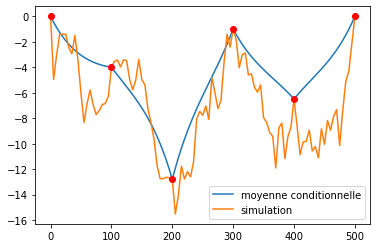

In [27]:
#On génère 𝜇|𝐙OBS=𝐳OBS,𝜇<0 avec l'algorithme précédent 
mu2 = simumu()
#On actualise Ec avec la nouvelle valeur de 𝜇
Ec2= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu2))

#On applique l'algorithme de la question 1
Cholesky = np.linalg.cholesky(SigmaCond)
n = np.shape(unknown_indexes)[0]
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec2 + np.matmul(Cholesky,x)
x_neg = x
for i in range(n):
    while Ec[i] + np.matmul(Cholesky,x_neg)[i] >= 0 :
        x_neg[i] = np.random.normal(0,1)
simu_rejet = Ec2 + np.matmul(Cholesky,x_neg)

allval3 = np.zeros(N)
allval4 = np.zeros(N)
allval3[unknown_indexes]=simu
allval4[unknown_indexes]=simu_rejet
allval3[observation_indexes]=depth
allval4[observation_indexes]=depth
plt.plot(discretization,allval1, label = 'moyenne conditionnelle')
plt.plot(discretization,allval4, label = 'simulation')
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.legend()
plt.show()

9. Générer 10000 profils de profondeur et calculer les longueurs de câble associées. Comparer la valeur moyenne de la longueur de câble, dont on visualisera la convergence, l'histogramme des longueurs de câble, l'intervalle de confiance obtenu par la méthode des quantiles, la probabilité de dépassement du seuil de 525 m avec les résultats obtenus précédemment. Commenter.

In [47]:
K=10000
result_mu = np.zeros(K)
result_rejet_mu = np.zeros(K)
for i in range(K):
    t_rejet = 0
    n_iter = 101
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]= Ec2 + np.matmul(Cholesky,x)
    result_mu[i] = length(allval3,Delta)
    x_rejet = x
    for j in range(n):
        while Ec2[j] + np.matmul(Cholesky,x_rejet)[j] >= 0 :
            x_rejet[j] = np.random.normal(0,1)
            t_rejet += 1
            n_iter += 1
    allval4[unknown_indexes] = Ec2 + np.matmul(Cholesky,x_rejet)
    result_rejet_mu[i]=length(allval4,Delta)
    rejet[i] = t_rejet/n_iter

print(f"taux de rejet : {sum(rejet)/K}")
#print(f"intervalle de confiance sans rejet : {np.quantile(result,[0.025,0.975])}")
print(f"intervalle de confiance avec rejet : {np.quantile(result_rejet,[0.025,0.975])}")
#print(f"probabilité de dépassement du seuil sans rejet : {np.mean(result>525)}")
print(f"probabilité de dépassement du seuil avec rejet : {np.mean(result_rejet>525)}")
print("\n")
#print(f"intervalle de confiance sans rejet, mu aléatoire : {np.quantile(result,[0.025,0.975])}")
print(f"intervalle de confiance avec rejet, mu aléatoire : {np.quantile(result_rejet_mu,[0.025,0.975])}")
#print(f"probabilité de dépassement du seuil sans rejet, mu aléatoire : {np.mean(result>525)}")
print(f"probabilité de dépassement du seuil avec rejet, mu aléatoire : {np.mean(result_rejet_mu>525)}")

taux de rejet : 0.020599103820887667
intervalle de confiance avec rejet : [516.36866607 527.34726823]
probabilité de dépassement du seuil avec rejet : 0.1075


intervalle de confiance avec rejet, mu aléatoire : [517.8494111  529.61896736]
probabilité de dépassement du seuil avec rejet, mu aléatoire : 0.3002


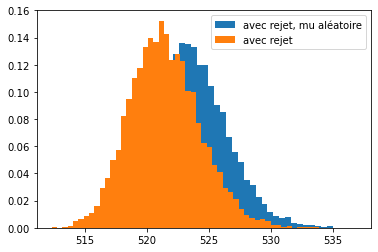

In [29]:
"""Comparaison des histogrammes"""

#plt.hist(result_mu,50,density=True, label = 'sans rejet, mu aléatoire')
plt.hist(result_rejet_mu,50,density=True, label = 'avec rejet, mu aléatoire')
#plt.hist(result,50,density=True, label = 'sans rejet')
plt.hist(result_rejet,50,density=True, label = 'avec rejet')

plt.legend()
plt.show()

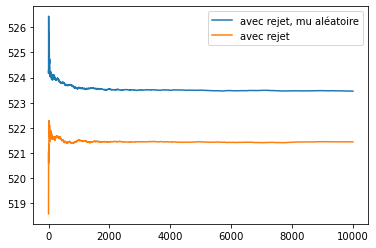

In [48]:
"""Comparaison des valeurs moyennes"""

indice_simu = 1+np.arange(K)
#plt.plot(indice_simu,np.cumsum(result)/indice_simu, label = 'sans rejet')
plt.plot(indice_simu,np.cumsum(result_rejet_mu)/indice_simu, label = 'avec rejet, mu aléatoire')
plt.plot(indice_simu,np.cumsum(result_rejet)/indice_simu, label = 'avec rejet')

plt.legend()
plt.show()

10. Qu'adviendrait-il selon vous si on rendait également aléatoires les autres paramètres du modèle $\sigma^2$ et $a$ ?

Rendre aléatoire une des données du problème a mis en évidence que la longueur de câble est plus importante. Ainsi, si 𝜎²  et 𝑎 sont aléatoires, la longueur de câble espéré sera encore plus importante. Cette modélisaion tient compte de l'erreur de mesure sur les différentes composantes.


#### Sur wikipédia : 
Une analyse bayésienne demande au départ une première modélisation très brute des connaissances. On estime à cette fin les ordres de grandeur vraisemblables des résultats (par exemple une moyenne, mais éventuellement aussi d'autres informations) et on leur associe une distribution de probabilité.

Le nombre de distributions de probabilité ayant la même moyenne étant infini, la distribution choisie sera la moins informée de toutes celles qui respectent les contraintes, puisque n'introduisant aucune information parasite, conformément au principe d'entropie maximale.

Cette information « floue » de départ est ensuite affinée par les observations à l'aide de la loi de Bayes, et donne ainsi une distribution a posteriori de plus en plus fine parce que traduisant en totalité l'information apportée par les observations.

Ainsi la distribution de longueur de câble est censé être plus proche de la réalité car on n'impose pas une valeur qui est en fait entache d'une erreur

11. (facultatif) On suppose désormais que $\alpha = \frac1{\sigma^2} \sim \Gamma(a_1,a_2)$, où $\sigma^2$ correspond au paramètre qui intervient dans la fonction $C$. Donner l'expression de la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$,  de $\mu | \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},$ et de $\mathbf{Z}_{\text{UNK}} | \mu, \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$. Proposer un algorithme de simulation tenant compte de l'incertitude sur le paramètre $\alpha$ et analyser son impact sur les différentes quantités évaluées.

    Indication : Pour identifier la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$, exprimer d'abord la densité jointe de $(\alpha,\mu, \mathbf{Z}_{\text{OBS}})$ puis marginaliser pour obtenir la densité de $(\alpha,\mathbf{Z}_{\text{OBS}})$


on refait tout en gros